# Original Model

I choose a model from Internet and did'nt change any parameter, but `StandardScaler()`  `X`

change the learning rate to 0.001, change the epochs to 200

custom scaler is `Y = Y/max(Y)`

`batch_size` to 10

In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
md_para = pd.read_csv('../data/substituted_benzene_para_md.csv',index_col=0,header=0)
md_orth = pd.read_csv('../data/substituted_benzene_orth_md.csv',index_col=0,header=0)
md_meta = pd.read_csv('../data/substituted_benzene_meta_md.csv',index_col=0,header=0)
mddata = pd.concat([md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)

gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_gamma.csv',index_col=0,header=0)
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_gamma.csv',index_col=0,header=0)
gammadata_para = pd.read_csv('../data/substituted_benzene_para_gamma.csv',index_col=0,header=0)
gammadata = pd.concat([gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)

In [3]:
def dfclean(data):
    temp = data[data.T[data.dtypes!=np.object].index]
    kk=[]
    for column in temp.columns:
        if len(set(temp[column]))<4:
            kk.append(column)
    result = temp.drop(columns=kk)
    return result

In [4]:
rawdataset = pd.merge(mddata, gammadata, on='cindex')
dataset = dfclean(rawdataset)

Y = dataset.iloc[:, -1]
Y = np.array(Y, dtype = np.float32).reshape(-1,1)


X = dataset.iloc[:, 1:-1]
X = np.array(X, dtype = np.float32)

#Y= StandardScaler().fit_transform(Y)
#Y = (Y - min(Y))/(max(Y) - min(Y))
Y = Y/max(Y)
X= StandardScaler().fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(units = 50, input_dim = X.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                47300     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 47,351
Trainable params: 47,351
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 300, batch_size = 10,validation_data = (X_test, y_test),verbose=0)
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
print("Neural Network RMS", rms)

Test loss: 0.018772579729557037
Test accuracy: 0.0
Neural Network RMS 0.1370130640835283


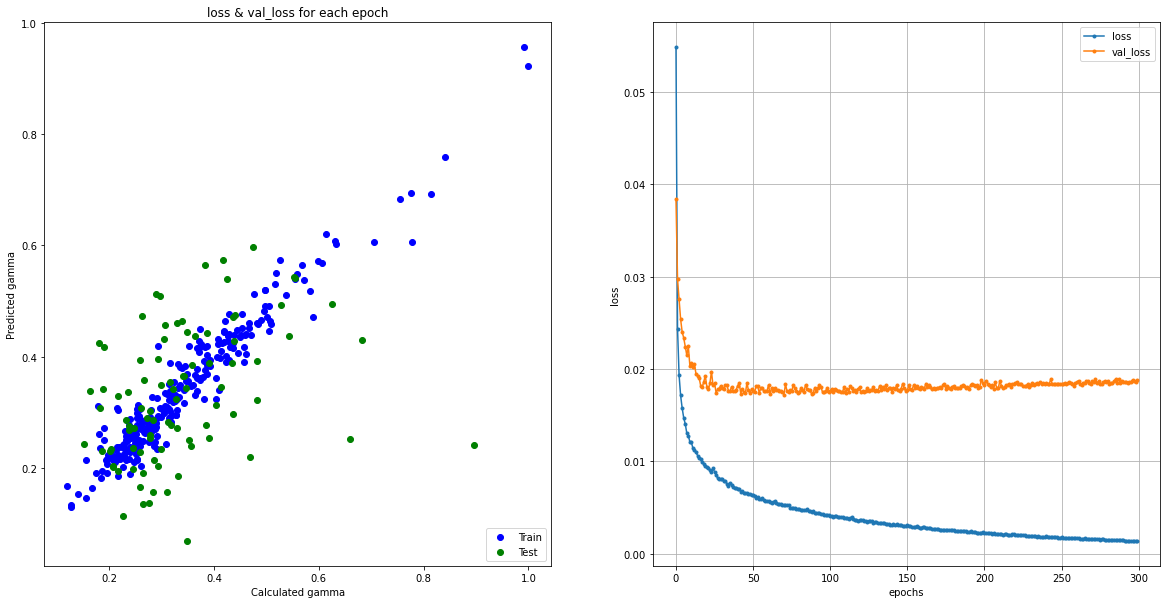

In [7]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_title('Neural Network Predictor')
ax1.set_xlabel('Calculated gamma')
ax1.set_ylabel('Predicted gamma')
ax1.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
ax1.scatter(y_test, model.predict(X_test),c='green', label = 'Test', alpha = None)
ax1.legend(loc = 4)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)

ax2 = fig.add_subplot(122)
ax1.set_title('loss & val_loss for each epoch')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.plot(range(epochs), loss, marker = '.', label = 'loss')
ax2.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
ax2.legend(loc = 'best')
ax2.grid()

plt.show()

## Conclusion

the loss is not get bigger, although the overfit

since `batch_zize` is less, the times of train is more, it time to add the dropout layer

### it is strange that the large gamma is not affected by the small, maybe the 去除了相同元素的原因